In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import warnings
warnings.simplefilter(action='ignore')

In [2]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

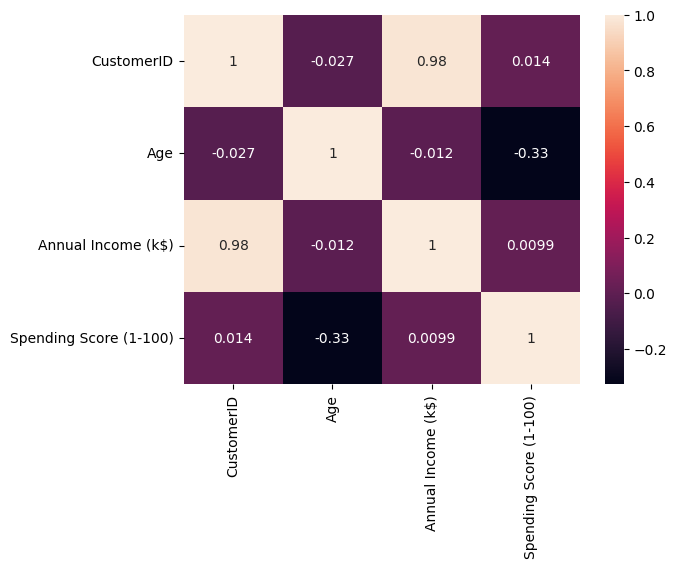

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [11]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: ylabel='count'>

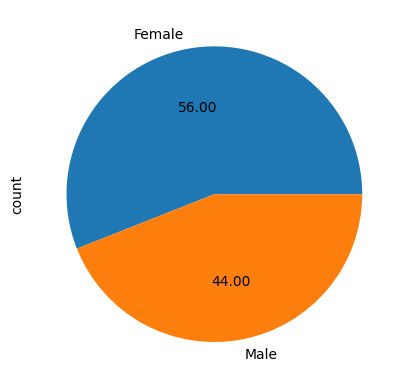

In [12]:
df['Gender'].value_counts().plot.pie(autopct='%.2f')

In [13]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [14]:
df['Age'].nunique()

51

<Axes: xlabel='Age', ylabel='count'>

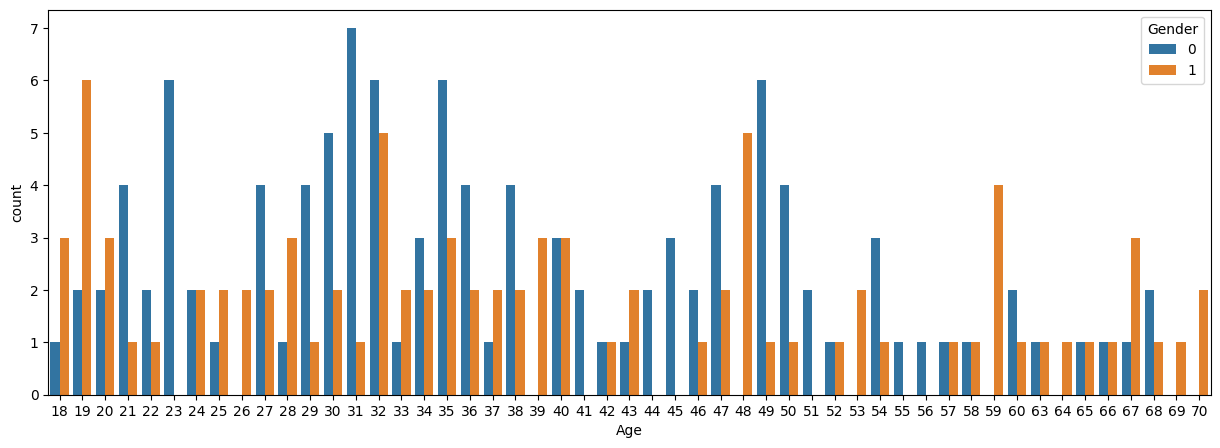

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Age', ylabel='Density'>

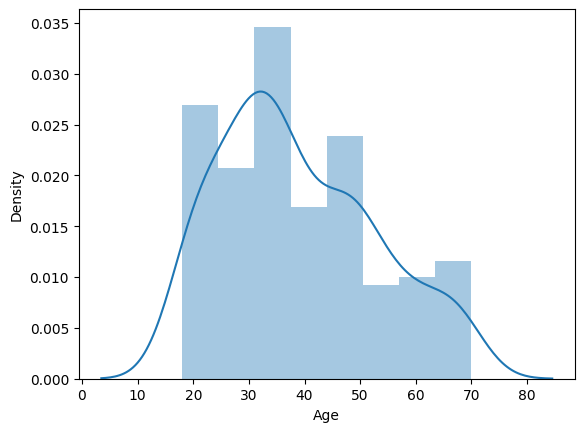

In [16]:
sns.distplot(df['Age'], kde=True)

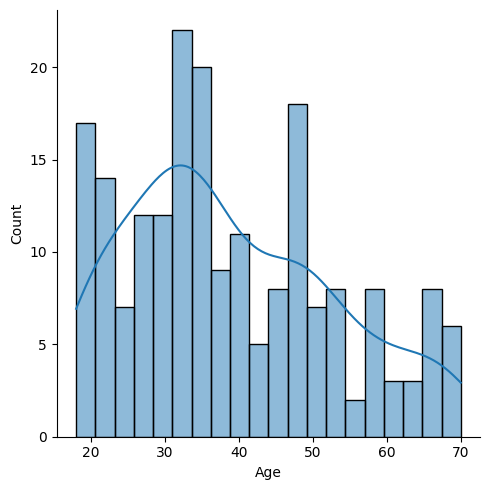

In [17]:
sns.displot(df['Age'],bins=20, kde=True)

In [18]:
df['Annual Income (k$)'].nunique()

64

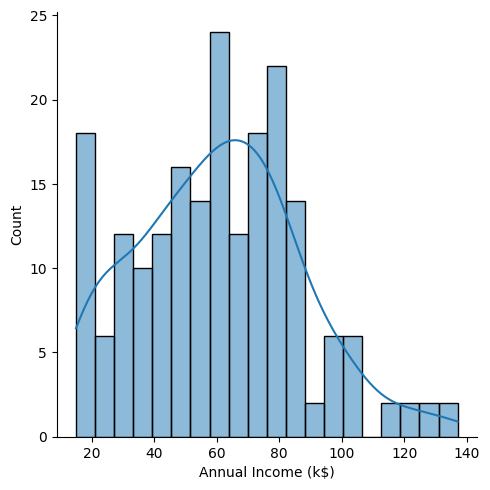

In [19]:
sns.displot(df['Annual Income (k$)'],bins=20, kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

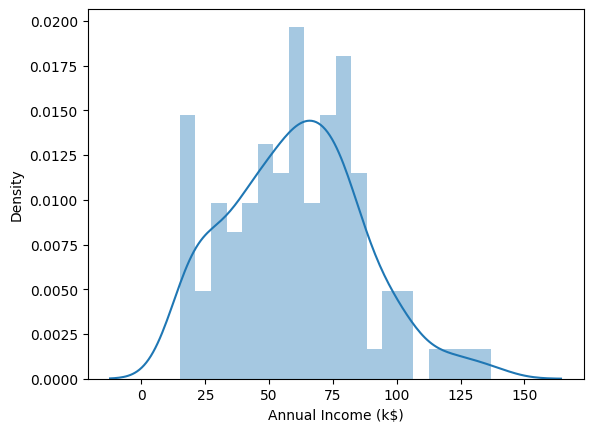

In [20]:
sns.distplot(df['Annual Income (k$)'], bins=20)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

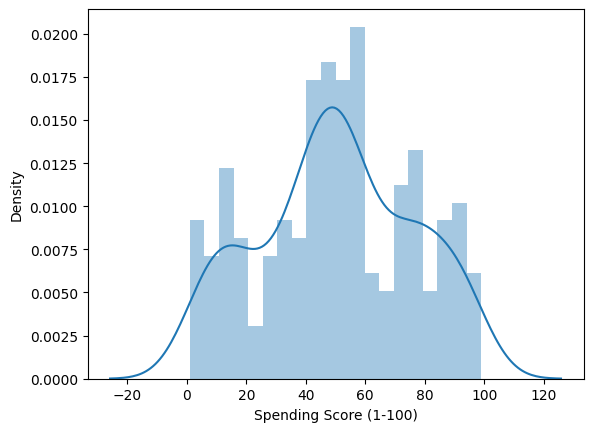

In [21]:
sns.distplot(df['Spending Score (1-100)'],  bins=20)

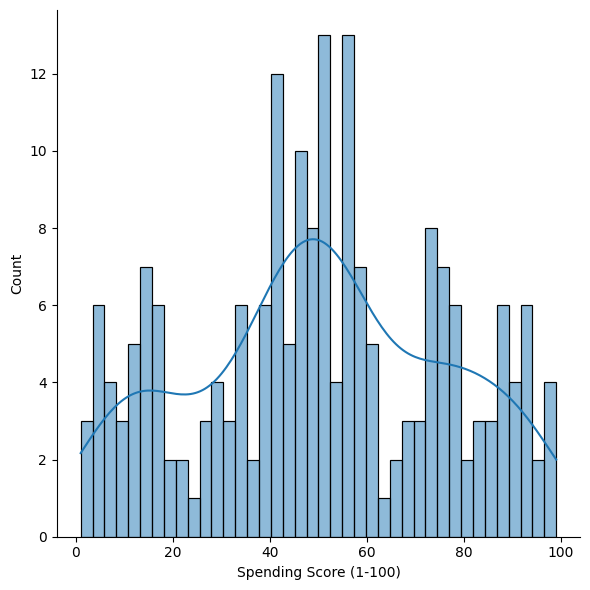

In [22]:
sns.displot(df['Spending Score (1-100)'], bins=40, kde=True, height=6)

<Axes: >

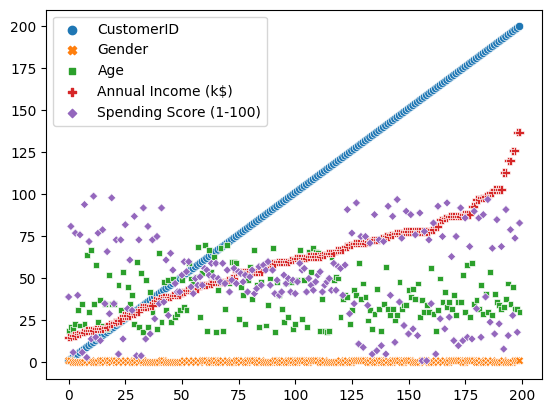

In [23]:
sns.scatterplot(df)

<Axes: ylabel='Annual Income (k$)'>

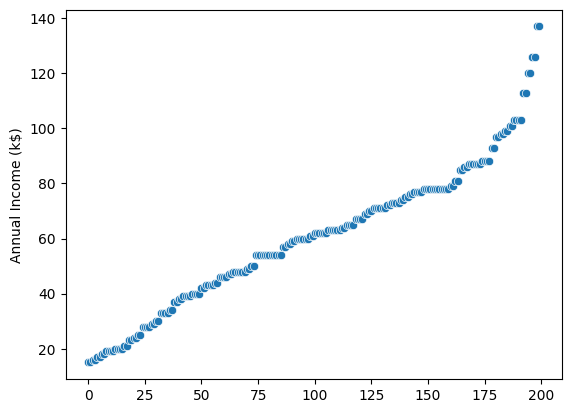

In [24]:
sns.scatterplot(df['Annual Income (k$)'])

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

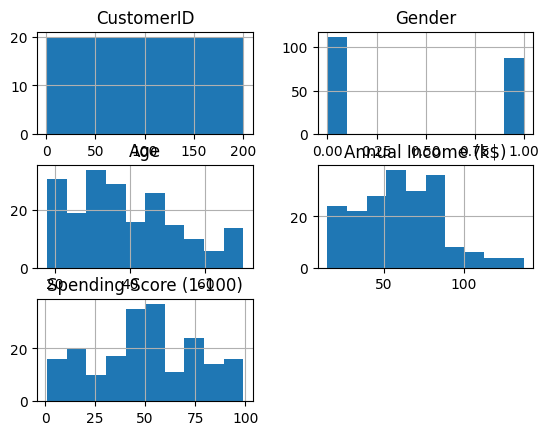

In [25]:
df.hist()

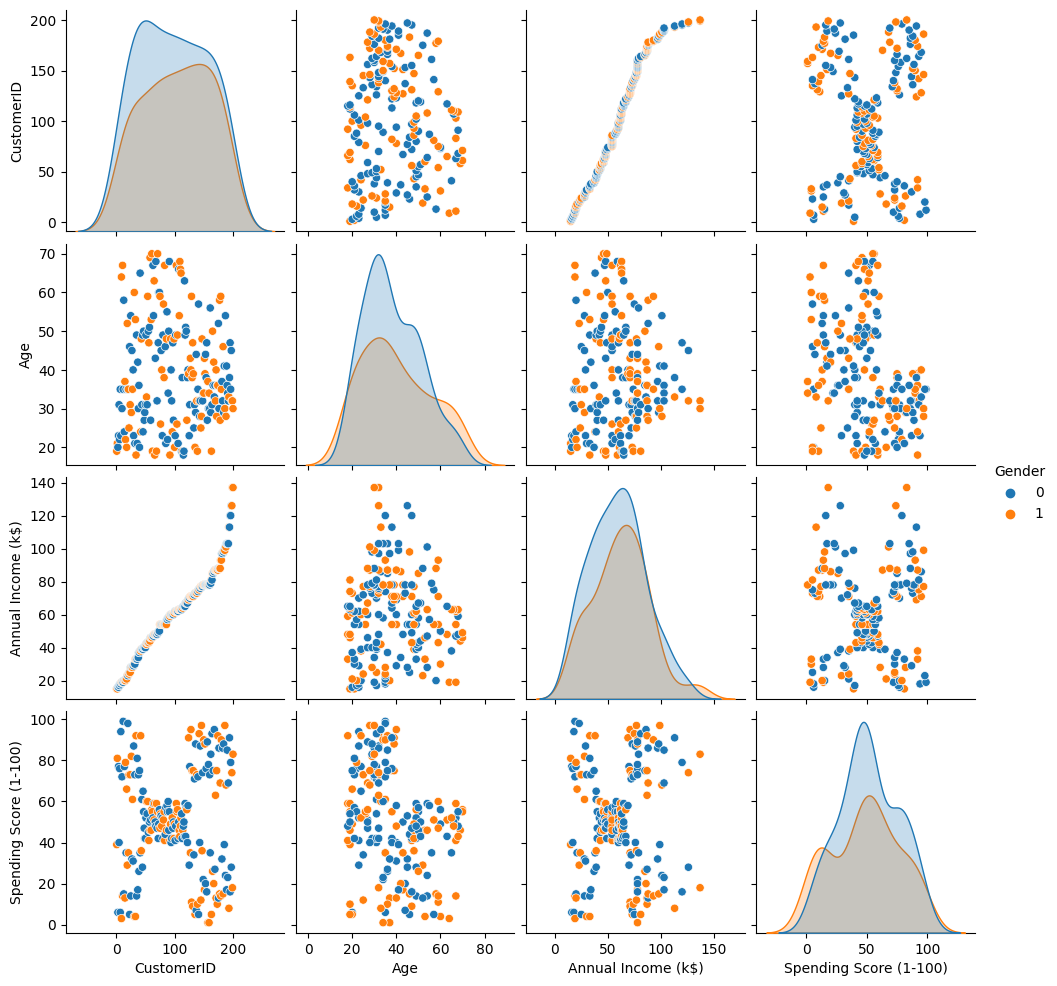

In [26]:
sns.pairplot(data=df, hue='Gender')

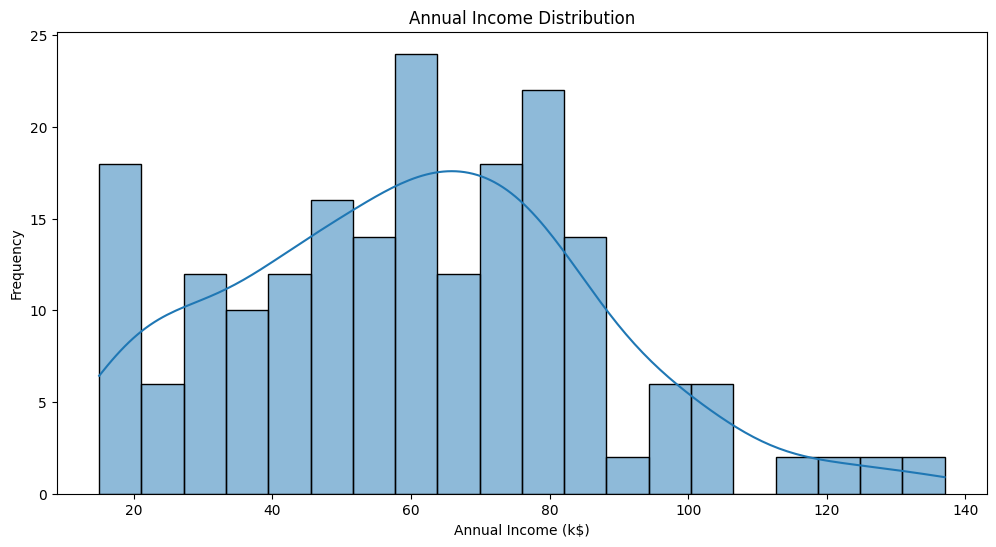

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

In [28]:
# sns.pairplot(df, hue='Gender', palette='husl')
# plt.show()

<Axes: >

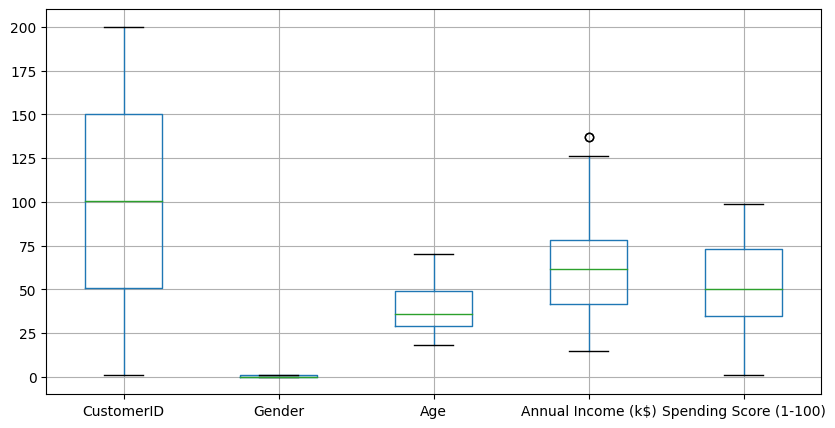

In [29]:
df.boxplot(figsize=(10,5))

In [30]:
df.shape

(200, 5)

In [31]:
#Removing Outliers

# Calculate IQR
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]

print(f"Original Dataset Shape: {df.shape}")

Original Dataset Shape: (198, 5)


In [32]:
df = df.drop('CustomerID', axis=1)

<Axes: >

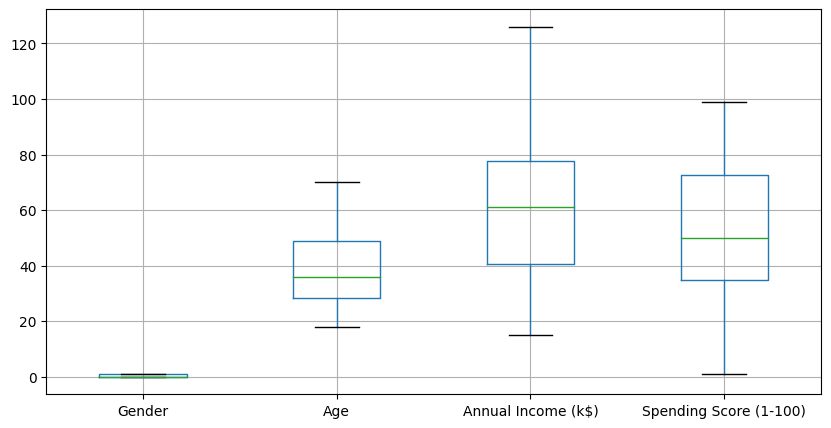

In [33]:
df.boxplot(figsize=(10,5))

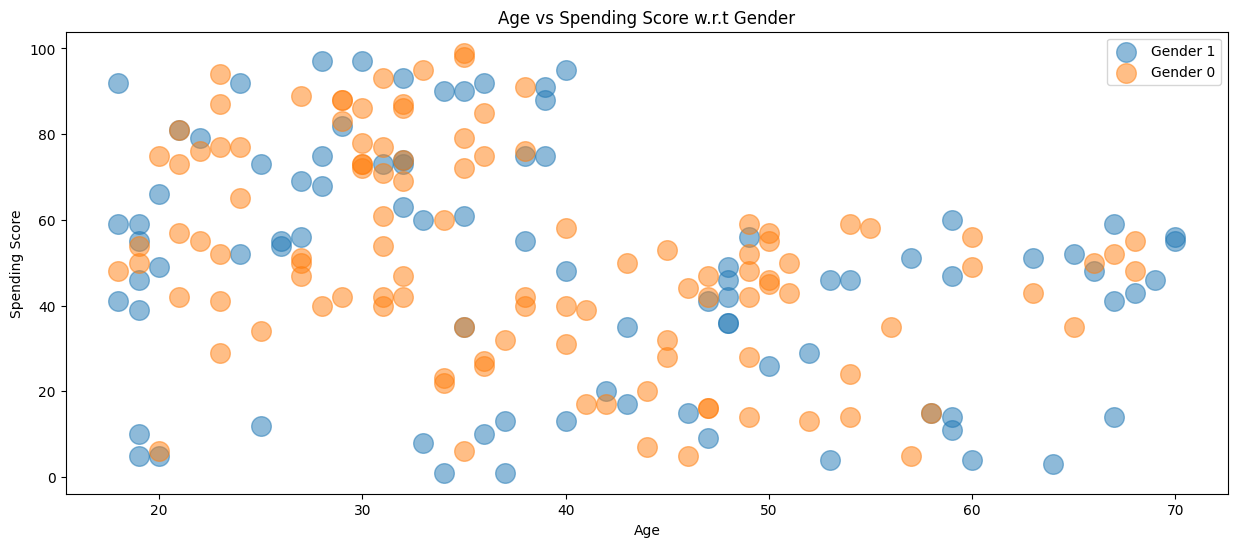

In [34]:
#Plotting graph on gender
plt.figure(1, figsize=(15, 6))
for gender in [1, 0]:
    plt.scatter(x='Age', 
                y='Spending Score (1-100)',
                data=df[df['Gender'] == gender],
                s=200, alpha=0.5, label=f'Gender {gender}')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

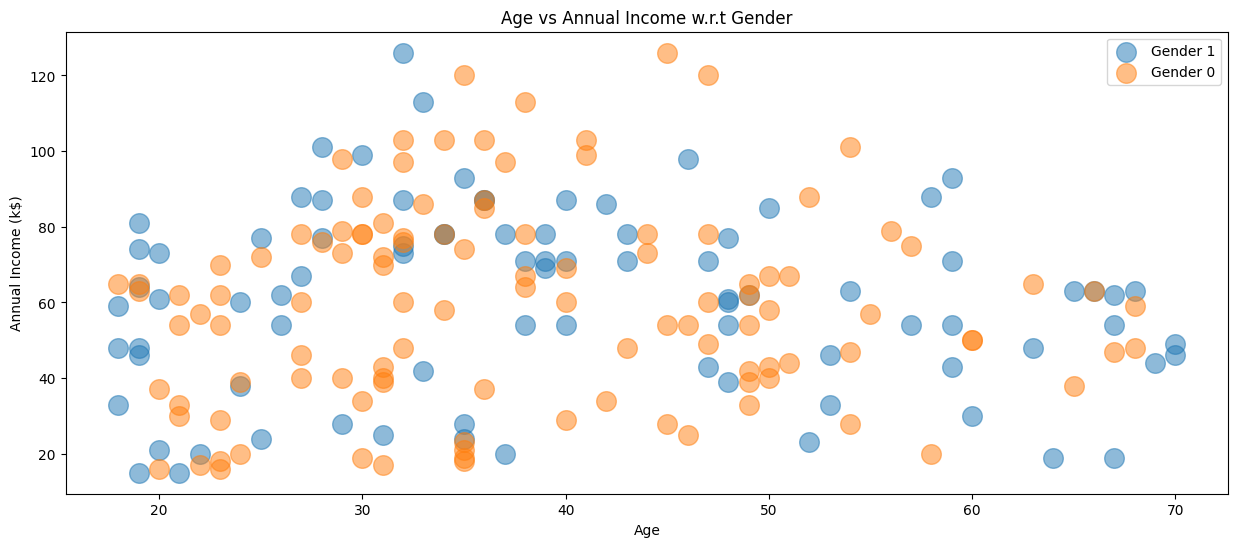

In [35]:
#Plotting graph on gender
plt.figure(1, figsize=(15, 6))
for gender in [1, 0]:
    plt.scatter(x='Age', 
                y='Annual Income (k$)', 
                data=df[df['Gender'] == gender],
                s=200, alpha=0.5, label=f'Gender {gender}')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

# Now ML Model KMeans

In [36]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  198 non-null    int64
 1   Age                     198 non-null    int64
 2   Annual Income (k$)      198 non-null    int64
 3   Spending Score (1-100)  198 non-null    int64
dtypes: int64(4)
memory usage: 7.7 KB


In [38]:
X = df.iloc[:, [2,3]]

In [39]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
193,113,91
194,120,16
195,120,79
196,126,28


In [40]:
k=[]
for i in range(1, 11):
    Kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(X)
    k.append(Kmeans.inertia_)

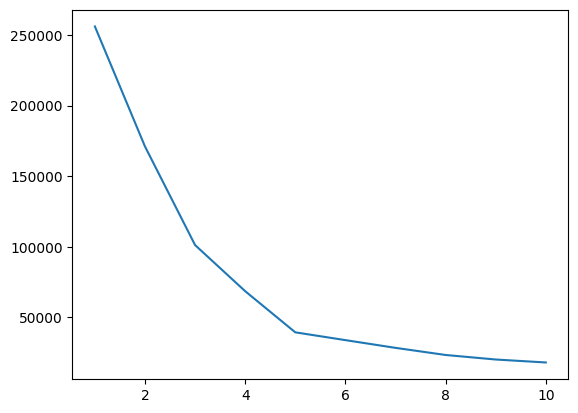

In [41]:
plt.plot(range(1,11),k)
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = range(1, 11)
inertia_errors = []
silhouette_scores = []

# Loop through cluster values
for k in n_clusters:
    model = KMeans(n_clusters=k, random_state=42)
    
    # Train the model
    model.fit(X)

    # Calculate Inertia (Sum of Squared Distances)
    inertia_errors.append(model.inertia_)

    # Calculate Silhouette Score (only if k > 1)
    if k > 1:
        score = silhouette_score(X, model.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # Placeholder for k=1

# Display results
print("Inertia:", inertia_errors)
print("Silhouette Scores:", silhouette_scores)

Inertia: [256064.409090909, 172491.3181818182, 101166.23927650377, 68497.6552538809, 39345.27707732771, 33830.09038456356, 28373.352213378017, 23259.080375180383, 20090.669322989677, 18001.523696713914]
Silhouette Scores: [None, 0.29900633510734437, 0.46541758070184547, 0.497441782578338, 0.5606825090788626, 0.4650105805464042, 0.4560439280820137, 0.4556599234869425, 0.45454114645963273, 0.45050549096777565]


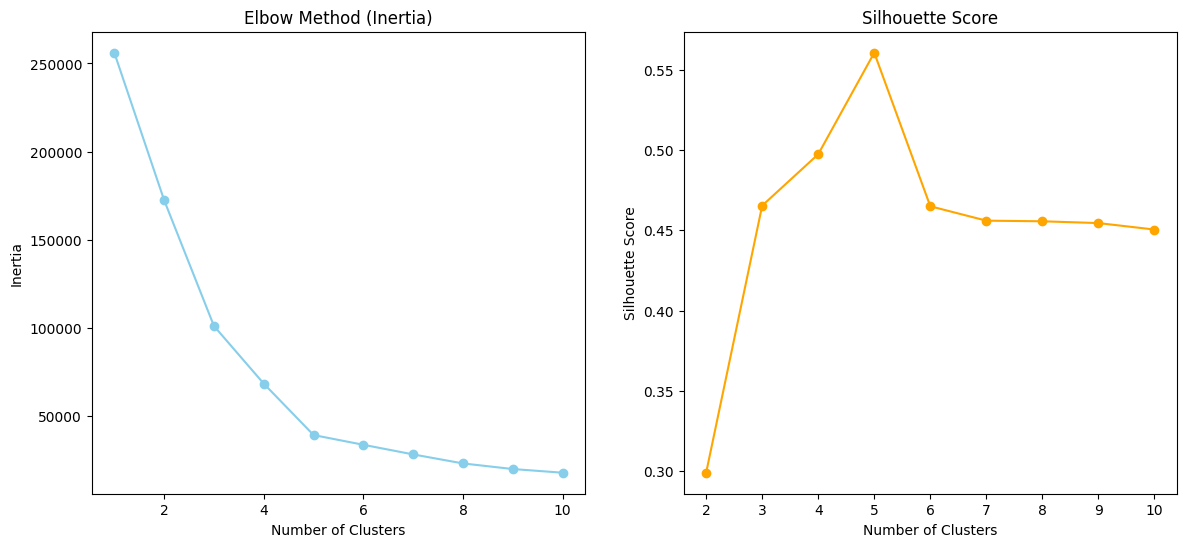

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Inertia
ax[0].plot(n_clusters, inertia_errors, marker='o', color='skyblue')
ax[0].set_title('Elbow Method (Inertia)')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

# Plot Silhouette Score
ax[1].plot(n_clusters[1:], silhouette_scores[1:], marker='o', color='orange')  # Skip k=1 for silhouette
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')

plt.show()

In [44]:
final_model = KMeans(n_clusters=5 , random_state= 42)
final_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [45]:
final_model

KMeans(n_clusters=5, random_state=42)

In [46]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])

[3 2 3 2 3]


In [47]:
labels

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4],
      dtype=int32)

In [48]:
len(labels)

198

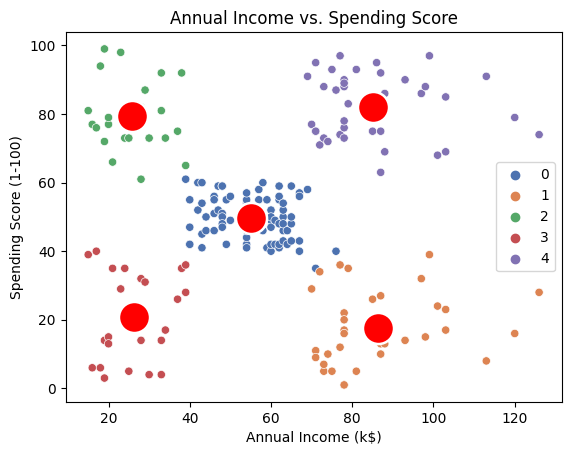

In [49]:
#plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Annual Income (k$)'] , y= df['Spending Score (1-100)'] ,hue=labels, palette='deep')
sns.scatterplot(x= centroids[:,0],y= centroids[: ,1],color= 'red',marker= 'o',s= 500)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

In [50]:
#Deep Embedding Clustering is in new notebook